In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv("tcs.csv")

# Create binary classification target: 1 if Close > Open, else 0
df['Target'] = (df['Tata Close'] > df['Tata Open']).astype(int)

# Feature selection
features = ['Tata Open', 'Tata High', 'Tata Low', 'Tata Volume']
X = df[features]
y = df['Target']

In [3]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)




In [4]:
# Train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

In [11]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")




Accuracy: 0.71


In [13]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[96 36]
 [36 80]]


In [15]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       132
           1       0.69      0.69      0.69       116

    accuracy                           0.71       248
   macro avg       0.71      0.71      0.71       248
weighted avg       0.71      0.71      0.71       248



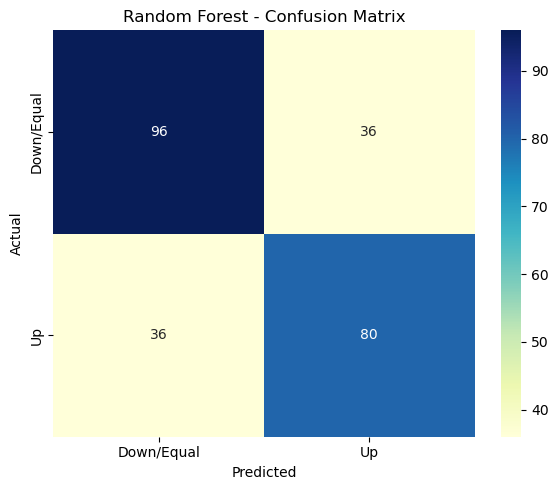

In [17]:
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Down/Equal', 'Up'],
            yticklabels=['Down/Equal', 'Up'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.tight_layout()
plt.show()

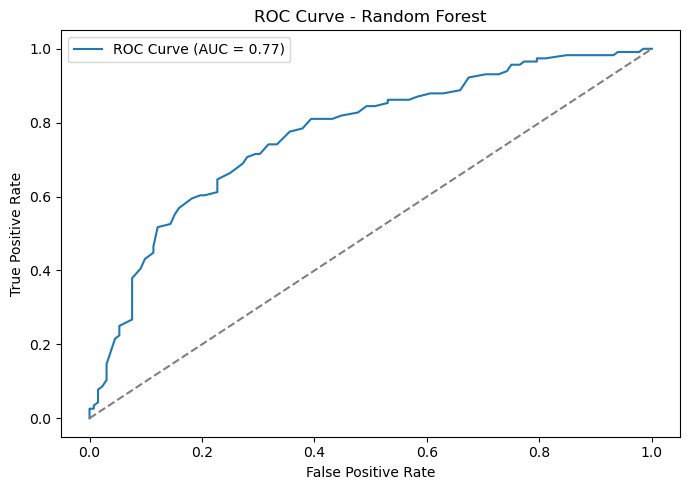

In [19]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.tight_layout()
plt.show()


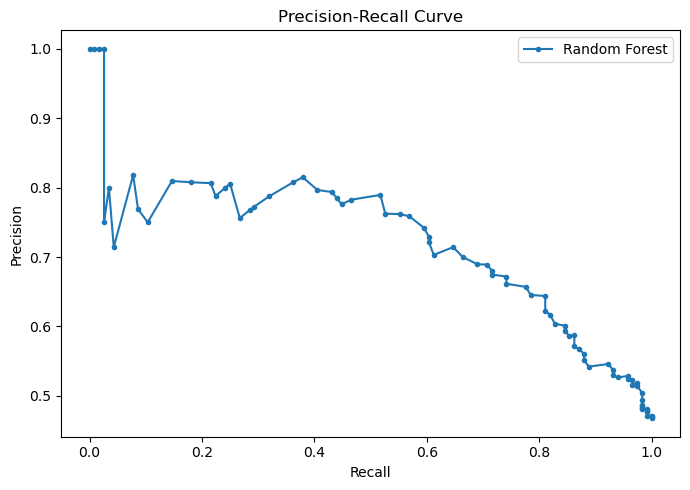

In [21]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Plot the curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.tight_layout()
plt.show()


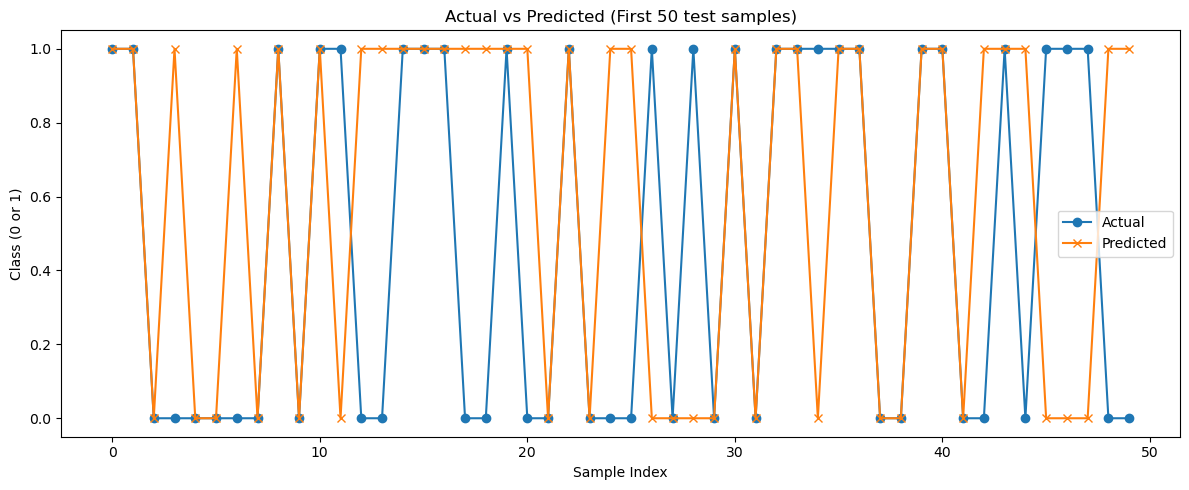

In [23]:
# Combine actual and predicted
df_results = X_test.copy()
df_results['Actual'] = y_test.values
df_results['Predicted'] = y_pred

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(df_results['Actual'].values[:50], label='Actual', marker='o')
plt.plot(df_results['Predicted'].values[:50], label='Predicted', marker='x')
plt.title('Actual vs Predicted (First 50 test samples)')
plt.xlabel('Sample Index')
plt.ylabel('Class (0 or 1)')
plt.legend()
plt.tight_layout()
plt.show()
